# Unidade 2 Trabalho 2 - Desempenho de algoritmos

## Objetivo Geral:  
Avaliar o desempenho de dois algoritmos fornecidos, considerando diversas entradas aleatórias e reproduzíveis, variando o tamanho do vetor de entrada até um valor N grande.

## Desenvolvimento

1. Instrumentar os código fornecidos com o módulo _time_ para medir o tempo de execução.
2. Realizar testes com vetores de tamanho variados.
3. Para cada tamanho de vetor, realizar múltiplas execuções e calcular o tempo médio e o intervalo de confiança.
4. Gerar gráficos que relacionam:
  a. Tamanho do vetor (eixo x);
  b. Tempo médio de execução (eixo y);
  c. Intervalos de confiança como barras de erro no gráfico.

### Classes

In [28]:
# from binarysearchtree import *
import plotly.graph_objs as go
# import pytest
import numpy as np
import matplotlib.pyplot as plt
from time import time
from scipy.stats import t
from binarysearchtree import BST

# Classe do Nó
class Node:
    """
    Uma classe que representa um nó em uma árvore de busca binária.

    Atributos:
    - value: o valor do nó
    - left_child: o filho esquerdo do nó
    - right_child: o filho direito do nó
    """

    def __init__(self, value):
        """
        Inicializa uma nova intancia da classe Node

        Args:
        - value: valor do nó
        """
        self.value = value
        self.left_child = None
        self.right_child = None

# Classe da Árvore
class BST:
    """
    Uma classe que representa uma árvore de busca binária.

    Atributos:
    - root: o nó raiz da árvore
    """

    def __init__(self):
        """
        Inicializa uma nova instância da classe BST
        """
        self.root = None

    def add(self, value):
        """
        Adiciona um novo nó com o valor dado à árvore.

        Args:
        - value: o valor do nó que será adicionado.
        """
        if self.root is None:
            # Se a raiz ainda não existe, crie-a
            self.root = Node(value)
        else:
            # Encontre o lugar certo e insira um novo valor
            self._add_recursive(self.root, value)

    def _add_recursive(self, current_node, value):
        """
        Um método auxiliar para percorrer a árvore recursivamente e encontrar a posição correta para adicionar o novo nó.

        Argumentos:
        - current_node: o nó atual a ser percorrido
        - value: o valor do nó a ser adicionado
        """
        if value <= current_node.value:
            # Vá para a esquerda
            if current_node.left_child is None:
                current_node.left_child = Node(value)
            else:
                self._add_recursive(current_node.left_child, value)
        else:
            # Vá para a direita
            if current_node.right_child is None:
                current_node.right_child = Node(value)
            else:
                self._add_recursive(current_node.right_child, value)

    def _contains(self, current_node, value):
        """
        Um método auxiliar para percorrer recursivamente a árvore e encontrar o nó com o valor fornecido.

        Args:
        - current_node: o nó atual a ser percorrido
        - value: o valor a ser procurado

        Returns:
        - Verdadeiro se um nó com o valor fornecido for encontrado, Falso caso contrário
        """
        if current_node is None:
            return False
        if current_node.value == value:
            return True
        if value < current_node.value:
            return self._contains(current_node.left_child, value)
        return self._contains(current_node.right_child, value)

    def contains(self, value):
        """
        Verifica se um nó com o valor fornecido está presente na árvore.

        Args:
        - value: o valor procurado.

        Returns:
        - Verdadeiro se um nó com o valor fornecido for encontrado, Falso caso contrário
        """
        return self._contains(self.root, value)

    def plot(self):
        """
        Plota a árvore de busca binária usando Plotly.
        """
        if self.root is None:
            print("The tree is empty!")
            return

        # Initialize lists for coordinates and connections
        node_coords = []
        lines = []

        # Função auxiliar para percorrer a árvore e preencher as listas de coordenadas e conexões
        def _plot_recursive(node, x, y, offset):
            if node is not None:
                node_coords.append((x, y, node.value))
                if node.left_child is not None:
                    new_x = x - offset
                    new_y = y - 1
                    lines.append((x, y, new_x, new_y))
                    _plot_recursive(node.left_child, new_x, new_y, offset / 2)
                if node.right_child is not None:
                    new_x = x + offset
                    new_y = y - 1
                    lines.append((x, y, new_x, new_y))
                    _plot_recursive(node.right_child, new_x, new_y, offset / 2)

        # Percorrer a árvore começando pelo nó raiz
        _plot_recursive(self.root, x=0, y=0, offset=0.5)

        # Crie um gráfico de dispersão para os nós
        node_trace = go.Scatter(x=[x for x, y, _ in node_coords],
                                y=[y for _, y, _ in node_coords],
                                text=[str(val) for _, _, val in node_coords],
                                mode='markers+text',
                                textposition='top center',
                                marker=dict(symbol='circle',
                                            size=20,
                                            color='darkblue'))

        # Crie um gráfico de dispersão para as conexões entre os nós
        line_trace = go.Scatter(x=sum([[x1, x2, None] for x1, y1, x2, y2 in lines], []),
                                y=sum([[y1, y2, None] for x1, y1, x2, y2 in lines], []),
                                mode='lines',
                                line=dict(color='black'))

        # Combine os dois gráficos de dispersão
        layout = go.Layout(title='',
                           xaxis=dict(title='', showgrid=False, zeroline=False, showticklabels=False),
                           yaxis=dict(title='', showgrid=False, zeroline=False, showticklabels=False),
                           showlegend=False)

        fig = go.Figure(data=[node_trace, line_trace], layout=layout)
        fig.show()

## Solver_closest

In [29]:
# %%file closestvalue.py

def findClosestValue(tree, target):
    """
    Encontra o valor em uma árvore de busca binária que é mais próximo do valor alvo fornecido.

    Esta função inicia a busca pelo valor mais próximo a partir da raiz da árvore de busca binária. 
    Ela funciona explorando a árvore recursivamente (ou sequencialmente), afinando a busca com base
    no valor alvo e no valor do nó atual. O valor mais próximo é constantemente atualizado durante 
    o processo de busca.

    Parâmetros:
    - tree (BinarySearchTree): O objeto da árvore de busca binária no qual o valor mais próximo será
    procurado. Espera-se que tenha um atributo 'root' que aponta para o nó raiz da árvore.
    - target (int ou float): O valor alvo para o qual o valor mais próximo na árvore de busca binária é buscado.

    Retorna:
    - int ou float: O valor na árvore de busca binária que é mais próximo do valor alvo.
    """
    return findClosestValueInBstHelper(tree.root, target, tree.root.value)

def findClosestValueInBstHelper(node, target, closest):
    if node is None:
        return closest
    if abs(target - closest) > abs(target - node.value):
        closest = node.value
    if target < node.value:
        return findClosestValueInBstHelper(node.left_child, target, closest)
    elif target > node.value:
        return findClosestValueInBstHelper(node.right_child, target, closest)
    else:
        return closest

## Solver_kth_largest

In [30]:
# %%file closestvalue.py

def findKthLargestValue(tree, k):
    """
    Encontra o k-ésimo maior inteiro em uma Árvore de Busca Binária (BST).

    A função percorre a BST de forma in-order para coletar os valores dos nós em uma lista ordenada. Em seguida, retorna o k-ésimo maior valor dessa lista. Assume-se que a BST contém apenas valores inteiros. Em caso de inteiros duplicados, eles são tratados como valores distintos. O k-ésimo maior inteiro é determinado no contexto desses valores distintos.

    Parâmetros:
    - tree (BST): a Árvore de Busca Binária (BST).
    - k (int): Um número inteiro positivo representando a posição k-ésima.

    Retorna:
    - int: O k-ésimo maior inteiro presente na BST.
    """

    sortedNodeValues = []
    inOrderTraverse(tree.root,sortedNodeValues)
    return sortedNodeValues[len(sortedNodeValues) - k]

def inOrderTraverse(node, sortedNodeValues):
    if node is None:
        return

    inOrderTraverse(node.left_child, sortedNodeValues)
    sortedNodeValues.append(node.value)
    inOrderTraverse(node.right_child, sortedNodeValues)

## Main

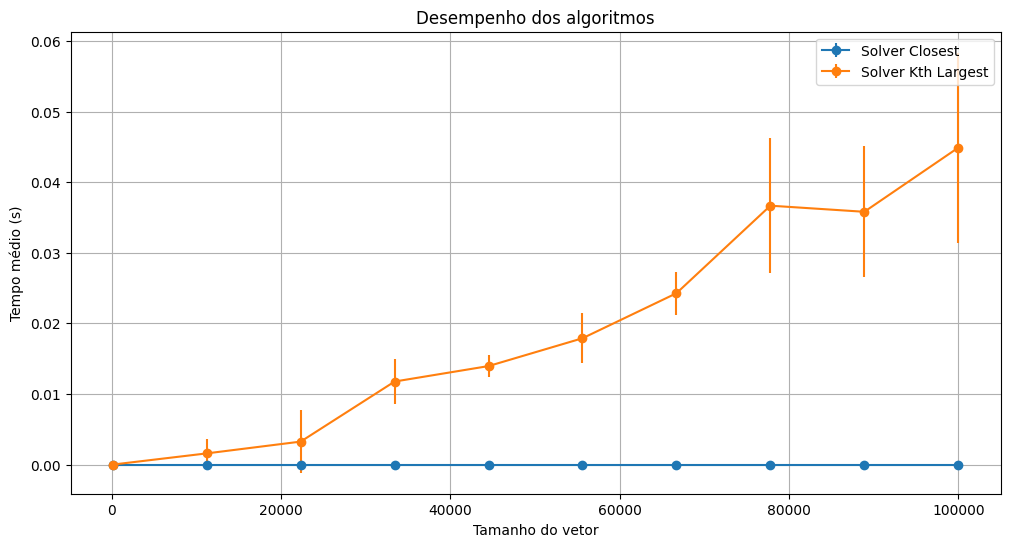

In [ ]:
# Parâmetros iniciais
np.random.seed(42)
N = 100000               # Tamanho máximo do vetor
steps = 10               # Número de tamanhos de vetor a testar
executions_per_size = 5  # Número de execuções por tamanho de vetor

# Tamanhos dos vetores a testar
vector_sizes = np.linspace(100, N, steps, dtype=int)

# Preparação para coleta de dados
results_closest = []
results_kth_largest = []
confidence_intervals_closest = []
confidence_intervals_kth_largest = []

# Testar os algoritmos

# Para cada tamanho de vetor (size) em vector_sizes,
# são criadas listas vazias (times_closest e times_kth_largest)
# para armazenar os tempos de execução de cada algoritmo em diferentes
# execuções.
for size in vector_sizes:
    times_closest = []
    times_kth_largest = []

    # executa executions_per_size (5) vezes para cada tamanho de vetor.
    for _ in range(executions_per_size):
        data = np.random.randint(0, 1000, size)
        
        # Cria árvore com valores de 'data'
        tree = BST()
        for value in data:
            tree.add(value)

        # Medir tempo para solver_closest
        start = time()
        findClosestValue(tree, target=50)
        times_closest.append(time() - start)

        # Medir tempo para solver_kth_largest
        start = time()
        findKthLargestValue(tree, k=10)
        times_kth_largest.append(time() - start)

    # Calcular médias e intervalos de confiança (95%)
    mean_closest = np.mean(times_closest)
    mean_kth_largest = np.mean(times_kth_largest)
    std_closest = np.std(times_closest, ddof=1)
    std_kth_largest = np.std(times_kth_largest, ddof=1)
    ci_closest = t.ppf(0.975, executions_per_size-1) * (std_closest / np.sqrt(executions_per_size))
    ci_kth_largest = t.ppf(0.975, executions_per_size-1) * (std_kth_largest / np.sqrt(executions_per_size))

    results_closest.append(mean_closest)
    results_kth_largest.append(mean_kth_largest)
    confidence_intervals_closest.append(ci_closest)
    confidence_intervals_kth_largest.append(ci_kth_largest)

# Gerar gráfico
plt.figure(figsize=(12, 6))
plt.errorbar(vector_sizes, results_closest, yerr=confidence_intervals_closest, label='Solver Closest', fmt='-o')
plt.errorbar(vector_sizes, results_kth_largest, yerr=confidence_intervals_kth_largest, label='Solver Kth Largest', fmt='-o')
plt.xlabel('Tamanho do vetor')
plt.ylabel('Tempo médio (s)')
plt.title('Desempenho dos algoritmos')
plt.legend()
plt.grid(True)
plt.show()